# CH04: Questions & Exercises

## 1. Read 'Intro to Data Structures' from pandas tutorial (https://pandas.pydata.org/pandas-docs/stable/dsintro.html)

In [3]:
import numpy as np
import pandas as pd

### Series

Series is a one-dimensional labeled array capable of holding any data type

In [11]:
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) # from ndarray

a    0.543828
b    0.671628
c    0.211173
d   -0.518766
e   -0.277745
dtype: float64

In [13]:
pd.Series(dict(one=1, two=2, four=3), index=["one", "two", "three", "four"]) # from dict

one      1.0
two      2.0
three    NaN
four     3.0
dtype: float64

In [16]:
pd.Series(5, index=['a', 'b', 'c']) # from scalar

a    5
b    5
c    5
dtype: int64

In [18]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [31]:
s[['a', 'b']]

a   -1.293489
b    0.217757
dtype: float64

In [33]:
s.get('z', np.nan)

nan

#### Vectorized operations and label alignment with Series

In [35]:
s ** 2

a    1.673113
b    0.047418
c    0.269694
d    2.245387
e    0.548872
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label.

In [37]:
s1 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series(np.random.randn(5), index=['c', 'd', 'e', 'f', 'g'])
s1 + s2

a         NaN
b         NaN
c    1.615717
d   -0.936478
e    2.203425
f         NaN
g         NaN
dtype: float64

In [39]:
s1 = pd.Series(np.random.randn(5), name="s1")
s2 = pd.Series(np.random.randn(3), name="s2")
s1 + s2

0   -2.472538
1   -0.217626
2   -1.229742
3         NaN
4         NaN
dtype: float64

### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

#### From dict of Series or dicts

In [45]:
d = {
     'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [46]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [80]:
data = { "a": dict(one=1, two=2), "b": dict(one=2, two=3) }
pd.DataFrame.from_dict(data)

,a,b
one,1,2
two,2,3


#### From structured or record array

In [55]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [56]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [57]:
pd.DataFrame(data, index=["one", "two"])


,A,B,C
one,1,2.0,b'Hello'
two,2,3.0,b'World'


In [61]:
pd.DataFrame(data, columns=['A', 'B', 'C', 'D'])

,A,B,C,D
0,1,2.0,b'Hello',NaN
1,2,3.0,b'World',NaN


#### From a list of dicts

In [65]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [71]:
pd.DataFrame(data2, columns=['a', 'b', 'c', 'd'], index=['one', 'two'])

,a,b,c,d
one,1,2,NaN,NaN
two,5,10,20.0,NaN


In [81]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

,A,B
0,1,4
1,2,5
2,3,6


#### From a dict of tuples

In [75]:
df = pd.DataFrame({
    ('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}
})
df

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [78]:
df['a'][['a']]

a
A B  4.0
  C  3.0
  D  NaN

#### Column selection, addition, deletion

In [98]:
d = {
     'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

In [99]:
df = pd.DataFrame(d)

In [100]:
df['one'] # return Series

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [101]:
df[["one"]] # return DataFrame

,one
a,1.0
b,2.0
c,3.0
d,NaN


In [102]:
df["three"] = df["one"] * df["two"]
df["four"] = 5
del df["two"]
df["new"] = pd.Series(np.random.randn(5), index=['a', 'b', 'd', 'e', 'f'])

In [104]:
df

,one,three,four,new
a,1.0,1.0,5,0.398134
b,2.0,4.0,5,0.127304
c,3.0,9.0,5,NaN
d,NaN,NaN,5,-0.485805


#### Assigning New Columns in Method Chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [44]:
# load iris dataset
from sklearn import datasets

source = datasets.load_iris()
iris = pd.DataFrame(source.data, columns=[ "_".join(x.split(" ")[:-1]) for x in source.feature_names ])
iris["name"] = source.target_names[source.target]

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris.assign(sepal_ratio = iris["sepal_length"]/iris["sepal_width"]).head() #assign creates copy of DF

,sepal_length,sepal_width,petal_length,petal_width,name,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


In [47]:
iris.query("sepal_length > 5").assign(
    sepal_ratio = lambda x: x["sepal_width"]/x["sepal_length"],
    petal_ratio = lambda x: x["petal_width"]/x["petal_length"]
).plot(kind="scatter", x="sepal_ratio", y="petal_ratio")

NameError: name '_converter' is not defined

#### Indexing / Selection

In [166]:
df = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
})

In [168]:
df.loc["a"]

one    1.0
two    1.0
Name: a, dtype: float64

In [169]:
df.iloc[0]

one    1.0
two    1.0
Name: a, dtype: float64

#### Data alignment and arithmetic

In [172]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

In [173]:
df

,A,B,C,D
0,-1.069900,0.088236,0.214342,-0.571256
1,2.056455,-1.716360,-0.014857,0.032942
2,1.538230,-0.215852,-0.025549,0.069170
3,1.747840,1.884837,-1.452316,1.286358
4,-0.186702,2.646112,-0.645515,1.603443
5,0.932601,-0.193115,-0.325674,-1.057481
6,0.314837,0.403682,0.679972,-1.657066
7,-0.573488,-0.369529,-0.538380,-1.081356
8,-0.183687,-1.471556,-0.805445,-1.422602
9,0.080259,0.265750,0.075279,0.807850


In [174]:
df2

,A,B,C
0,-0.600120,0.400082,-0.430643
1,1.582850,1.163524,-1.145350
2,1.311341,1.011865,-0.164922
3,-1.848162,-0.130352,-0.847354
4,1.144522,-0.969319,0.273177
5,0.222155,0.787582,-0.849413
6,-1.462428,0.577994,1.385249


In [175]:
df + df2

,A,B,C,D
0,-1.670020,0.488318,-0.216301,NaN
1,3.639305,-0.552836,-1.160207,NaN
2,2.849572,0.796013,-0.190471,NaN
3,-0.100322,1.754485,-2.299670,NaN
4,0.957819,1.676793,-0.372337,NaN
5,1.154757,0.594466,-1.175087,NaN
6,-1.147590,0.981676,2.065222,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [176]:
df * 2 + 10

,A,B,C,D
0,7.860199,10.176473,10.428684,8.857487
1,14.112909,6.567279,9.970286,10.065883
2,13.076460,9.568297,9.948903,10.138340
3,13.495680,13.769675,7.095368,12.572717
4,9.626596,15.292224,8.708971,13.206887
5,11.865203,9.613769,9.348653,7.885038
6,10.629675,10.807365,11.359945,6.685868
7,8.853023,9.260941,8.923241,7.837287
8,9.632625,7.056888,8.389110,7.154796
9,10.160518,10.531499,10.150558,11.615700


#### Transposing

In [178]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,-1.069900,2.056455,1.538230,1.747840,-0.186702,0.932601,0.314837,-0.573488,-0.183687,0.080259
B,0.088236,-1.716360,-0.215852,1.884837,2.646112,-0.193115,0.403682,-0.369529,-1.471556,0.265750
C,0.214342,-0.014857,-0.025549,-1.452316,-0.645515,-0.325674,0.679972,-0.538380,-0.805445,0.075279
D,-0.571256,0.032942,0.069170,1.286358,1.603443,-1.057481,-1.657066,-1.081356,-1.422602,0.807850


#### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, ...) and various other NumPy functions can be used with no issues on DataFrame, assuming the data within are numeric:

In [180]:
df = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
})

In [181]:
np.exp(df)

,one,two
a,2.718282,2.718282
b,7.389056,7.389056
c,20.085537,20.085537
d,NaN,54.598150


In [182]:
np.asarray(df)

array([[  1.,   1.],
       [  2.,   2.],
       [  3.,   3.],
       [ nan,   4.]])

In [185]:
s = pd.Series(np.random.randn(5))
s

0   -1.419129
1   -0.637845
2    2.000735
3   -1.117479
4   -2.028502
dtype: float64

In [184]:
s.dot(s)

7.413153310763934

#### Console display

In [187]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

In [188]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [195]:
iris[["sepal_length", "sepal_width"]].iloc[0:10,:].to_string()

'   sepal_length  sepal_width\n0           5.1          3.5\n1           4.9          3.0\n2           4.7          3.2\n3           4.6          3.1\n4           5.0          3.6\n5           5.4          3.9\n6           4.6          3.4\n7           5.0          3.4\n8           4.4          2.9\n9           4.9          3.1'

#### DataFrame column attribute access and IPython completion

In [197]:
df = pd.DataFrame({
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
})

df.one

## 3. Read '4.3. Preprocessing data'

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

### 4.3.1. Standardization, or mean removal and variance scaling

In [3]:
from sklearn import preprocessing
import numpy as np

In [6]:
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [7]:
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
X_scaled.mean(axis=0)

array([ 0.,  0.,  0.])

In [9]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.])

In [21]:
scaler = preprocessing.StandardScaler().fit(X_train) # enable to apply the same standarization to different datasets

StandardScaler: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [12]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [14]:
scaler.mean_

array([ 1.        ,  0.        ,  0.33333333])

In [19]:
scaler.scale_

array([ 0.81649658,  0.81649658,  1.24721913])

In [20]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

#### 4.3.1.1. Scaling features to a range

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [24]:
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])

In [25]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

In [27]:
X_train_minmax = min_max_scaler.transform(X_train)
X_train_minmax

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

In [28]:
def minmax_scale(X, min=0, max=1):
    X_scaled = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
    return X_scaled*(max - min) + min

In [29]:
minmax_scale(X_train)

array([[ 0.5       ,  0.        ,  1.        ],
       [ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  1.        ,  0.        ]])

MaxAbsScaler works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [30]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(X_train)

In [32]:
X_train_maxabs = max_abs_scaler.transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

#### 4.3.1.2. Scaling sparse data

Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.

#### 4.3.1.3. Scaling data with outliers

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.

In [44]:
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.], [5.0, 1.0, 10.0]])

In [45]:
robust_scaler = preprocessing.RobustScaler().fit(X_train)
standard_scaler = preprocessing.StandardScaler().fit(X_train)

In [46]:
robust_scaler.transform(X_train)

array([[-0.25      , -1.2       ,  0.23529412],
       [ 0.25      , -0.4       , -0.23529412],
       [-0.75      ,  0.4       , -0.47058824],
       [ 1.75      ,  0.4       ,  2.11764706]])

In [47]:
standard_scaler.transform(X_train)

array([[-0.53452248, -1.50755672, -0.17349448],
       [ 0.        , -0.30151134, -0.63614643],
       [-1.06904497,  0.90453403, -0.8674724 ],
       [ 1.60356745,  0.90453403,  1.6771133 ]])

### 4.3.2. Non-linear transformation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [50]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

array([ 4.3,  5.1,  5.8,  6.5,  7.9])

(array([ 1.07142879,  0.98214305,  0.98214305,  0.80357159,  0.98214305,
         1.16071452,  0.89285732,  1.16071452,  0.89285732,  1.07142879]),
 array([  9.99999998e-08,   1.00000080e-01,   2.00000060e-01,
          3.00000040e-01,   4.00000020e-01,   5.00000000e-01,
          5.99999980e-01,   6.99999960e-01,   7.99999940e-01,
          8.99999920e-01,   9.99999900e-01]),
 <a list of 10 Patch objects>)

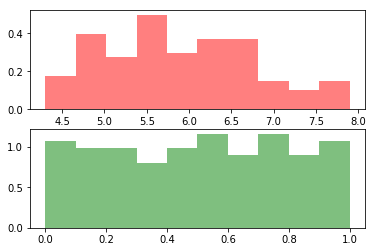

In [82]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, sharex=False)
axarr[0].hist(X_train[:,0], 10, normed=1, facecolor='red', alpha=0.5)
axarr[1].hist(X_train_trans[:,0], 10, normed=1, facecolor='green', alpha=0.5)

In [83]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([ 4.4  ,  5.125,  5.75 ,  6.175,  7.3  ])

In [84]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([ 0.01351351,  0.25012513,  0.47972973,  0.6021021 ,  0.94144144])

### 4.3.3. Normalization

Normalization is the process of scaling **individual samples**(not features) to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [87]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [88]:
normalizer = preprocessing.Normalizer().fit(X)

In [91]:
X_norm = normalizer.transform(X)
X_norm

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [95]:
np.sqrt(X_norm[:,0].dot(X_norm[:,0]))

1.0801234497346435

In [98]:
np.linalg.norm(X_norm, axis=1)

array([ 1.,  1.,  1.])

### 4.3.4. Binarization

#### 4.3.4.1. Feature binarization

Feature binarization is the process of thresholding numerical features to get boolean values.

In [101]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [108]:
binarizer = preprocessing.Binarizer(threshold=-0.01).fit(X)

In [109]:
binarizer.transform(X)

array([[ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  0.]])

### 4.3.5. Encoding categorical features

In [123]:
X = np.array([["male", 15], 
              ["female", 18], 
              ["female", 21]])

In [126]:
le = preprocessing.LabelEncoder().fit(X[:,0])
X[:,0] = le.transform(X[:,0])

In [136]:
enc = preprocessing.OneHotEncoder(categorical_features=[0]).fit(X)
enc.transform(X).toarray()

array([[  0.,   1.,  15.],
       [  1.,   0.,  18.],
       [  1.,   0.,  21.]])

### 4.3.6. Imputation of missing values

In [144]:
X = np.array([[1, 2], [np.nan, 3], [7, 6]])
X

array([[  1.,   2.],
       [ nan,   3.],
       [  7.,   6.]])

In [138]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)                  

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [143]:
X = np.array([[np.nan, 2], [6, np.nan], [7, 6]])
X

array([[ nan,   2.],
       [  6.,  nan],
       [  7.,   6.]])

In [142]:
imp.transform(X)

array([[ 4.        ,  2.        ],
       [ 6.        ,  3.66666667],
       [ 7.        ,  6.        ]])

### 4.3.7. Generating polynomial features

In [147]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [150]:
poly = preprocessing.PolynomialFeatures(2).fit(X)

In [151]:
poly.transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

### 4.3.8. Custom transformers

In [154]:
X = np.array([[0, 1], [2, 3]])
X

array([[0, 1],
       [2, 3]])

In [161]:
transformer = preprocessing.FunctionTransformer(lambda x: np.ones(x.shape))

In [162]:
transformer.transform(X)

array([[ 1.,  1.],
       [ 1.,  1.]])

## 8. Implement forward feature selection algorithm.

In [2]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

In [3]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from ch04.feature_selection import FFS

In [29]:
# Create dataset

wine = datasets.load_wine()

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine["Class label"] = wine.target + 1 # add one to have the same values as in the book

X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

ffs = FFS(knn)
ffs.fit(X_train_std, y_train)

In [31]:
ffs.subsets_

[[6],
 [6, 12],
 [6, 12, 9],
 [6, 12, 9, 5],
 [6, 12, 9, 5, 11],
 [6, 12, 9, 5, 11, 7],
 [6, 12, 9, 5, 11, 7, 0],
 [6, 12, 9, 5, 11, 7, 0, 3],
 [6, 12, 9, 5, 11, 7, 0, 3, 8],
 [6, 12, 9, 5, 11, 7, 0, 3, 8, 4],
 [6, 12, 9, 5, 11, 7, 0, 3, 8, 4, 10],
 [6, 12, 9, 5, 11, 7, 0, 3, 8, 4, 10, 1],
 [6, 12, 9, 5, 11, 7, 0, 3, 8, 4, 10, 1, 2]]

In [32]:
scores = []
for subset in ffs.subsets_:
    knn.fit(X_train_std[:,subset], y_train)
    
    y_train_pred = knn.predict(X_train_std[:,subset])
    y_test_pred = knn.predict(X_test_std[:,subset])
    
    scores.append((accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
    
scores = pd.DataFrame(scores, columns=["Train", "Test"])

In [8]:
scores

,Train,Test
0,0.862903,0.703704
1,0.967742,0.833333
2,0.975806,0.944444
3,0.983871,0.925926
4,0.991935,0.944444
5,0.983871,0.944444
6,0.967742,0.962963
7,0.983871,0.981481
8,0.991935,0.981481
9,0.983871,0.962963


## 12. Implement exhaustive feature selection algorithm.

In [ ]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

In [37]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from ch04.feature_selection import EFS

In [38]:
# Create dataset

wine = datasets.load_wine()

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine["Class label"] = wine.target + 1 # add one to have the same values as in the book

X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

efs = EFS(knn)
efs.fit(X_train_std, y_train)

In [40]:
efs.subsets_

[(6,),
 (6, 12),
 (0, 4, 6),
 (0, 4, 6, 12),
 (0, 1, 3, 6, 12),
 (0, 6, 7, 9, 10, 12),
 (0, 1, 2, 3, 6, 9, 12),
 (0, 1, 2, 3, 6, 8, 9, 12),
 (0, 2, 3, 5, 6, 8, 9, 11, 12),
 (0, 1, 4, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]

In [41]:
scores = []
for subset in efs.subsets_:
    knn.fit(X_train_std[:,subset], y_train)
    
    y_train_pred = knn.predict(X_train_std[:,subset])
    y_test_pred = knn.predict(X_test_std[:,subset])
    
    scores.append((accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
    
scores = pd.DataFrame(scores, columns=["Train", "Test"])

In [42]:
scores

,Train,Test
0,0.862903,0.703704
1,0.967742,0.833333
2,0.975806,0.925926
3,0.983871,0.944444
4,0.991935,0.981481
5,1.000000,0.981481
6,1.000000,0.981481
7,1.000000,1.000000
8,1.000000,0.981481
9,0.991935,1.000000


In [43]:
scores.plot()

NameError: name '_converter' is not defined

## 11. Read 'Working with missing data' (pandas doc)

https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [51]:
import pandas as pd
import numpy as np

### Missing data basics

In [52]:
df = pd.DataFrame(
    np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
    columns=['one', 'two', 'three']
)
df

,one,two,three
a,-0.950932,0.538364,-1.039546
c,-0.351418,-0.706546,-0.196251
e,0.166222,1.708461,0.507702
f,0.377389,1.484142,-0.039284
h,-0.476261,0.150578,-0.353988


In [56]:
df["four"] = "bar"
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,-0.950932,0.538364,-1.039546,bar,False
c,-0.351418,-0.706546,-0.196251,bar,False
e,0.166222,1.708461,0.507702,bar,True
f,0.377389,1.484142,-0.039284,bar,True
h,-0.476261,0.150578,-0.353988,bar,False


In [61]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], columns=["one", "two", "three", "four", "five", "six"])
df2

,one,two,three,four,five,six
a,-0.950932,0.538364,-1.039546,bar,False,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN
c,-0.351418,-0.706546,-0.196251,bar,False,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN
e,0.166222,1.708461,0.507702,bar,True,NaN
f,0.377389,1.484142,-0.039284,bar,True,NaN
g,NaN,NaN,NaN,NaN,NaN,NaN
h,-0.476261,0.150578,-0.353988,bar,False,NaN


**reindes**: Conform DataFrame to new index with optional filling logic, placing NA/NaN in locations having no value in the previous index. A new object is produced unless the new index is equivalent to the current one and copy=False. (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

In [64]:
df2["one"].isna() # pd.isna(df2["one"])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [65]:
pd.notna(df2["one"])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [67]:
df2.isna()

,one,two,three,four,five,six
a,False,False,False,False,False,True
b,True,True,True,True,True,True
c,False,False,False,False,False,True
d,True,True,True,True,True,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,True,True,True,True,True
h,False,False,False,False,False,True


### Inserting missing data

In [74]:
s = pd.Series([1, 2, 3])
s.loc[0] = np.nan
s.loc[1] = None
s

0    NaN
1    NaN
2    3.0
dtype: float64

### Calculations with missing data

In [77]:
a = df2[["one", "two"]]
a

,one,two
a,-0.950932,0.538364
b,NaN,NaN
c,-0.351418,-0.706546
d,NaN,NaN
e,0.166222,1.708461
f,0.377389,1.484142
g,NaN,NaN
h,-0.476261,0.150578


In [78]:
a * 2

,one,two
a,-1.901863,1.076728
b,NaN,NaN
c,-0.702835,-1.413092
d,NaN,NaN
e,0.332443,3.416923
f,0.754779,2.968283
g,NaN,NaN
h,-0.952522,0.301155


In [81]:
df2.sum() #ignore missing values

one     -1.234999
two      3.174999
three   -1.121367
five     2.000000
six      0.000000
dtype: float64

In [84]:
a.cumsum()

,one,two
a,-0.950932,0.538364
b,NaN,NaN
c,-1.302349,-0.168182
d,NaN,NaN
e,-1.136128,1.540280
f,-0.758738,3.024421
g,NaN,NaN
h,-1.234999,3.174999


### Cleaning / filling missing data

#### Filling missing values: fillna

In [94]:
df2.fillna(0)

,one,two,three,four,five,six
a,-0.950932,0.538364,-1.039546,bar,False,0.0
b,0.000000,0.000000,0.000000,0,0,0.0
c,-0.351418,-0.706546,-0.196251,bar,False,0.0
d,0.000000,0.000000,0.000000,0,0,0.0
e,0.166222,1.708461,0.507702,bar,True,0.0
f,0.377389,1.484142,-0.039284,bar,True,0.0
g,0.000000,0.000000,0.000000,0,0,0.0
h,-0.476261,0.150578,-0.353988,bar,False,0.0


In [97]:
df2.fillna(0, limit=1)

,one,two,three,four,five,six
a,-0.950932,0.538364,-1.039546,bar,False,0.0
b,0.000000,0.000000,0.000000,0,0,NaN
c,-0.351418,-0.706546,-0.196251,bar,False,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN
e,0.166222,1.708461,0.507702,bar,True,NaN
f,0.377389,1.484142,-0.039284,bar,True,NaN
g,NaN,NaN,NaN,NaN,NaN,NaN
h,-0.476261,0.150578,-0.353988,bar,False,NaN


#### Filling with a PandasObject

You can also fillna using a dict or Series that is alignable.

In [100]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan
dff

,A,B,C
0,-0.786745,-1.186357,-0.435920
1,2.630190,-0.109984,-0.391276
2,-0.767289,0.495532,0.982615
3,NaN,-0.546577,-0.732731
4,NaN,NaN,0.476658
5,-0.798510,NaN,NaN
6,0.744280,-1.186712,NaN
7,-1.992346,0.529771,NaN
8,0.709445,0.092279,-1.832843
9,-1.566666,-1.772473,-0.161035


In [102]:
dff.fillna(dff.mean())

,A,B,C
0,-0.786745,-1.186357,-0.435920
1,2.630190,-0.109984,-0.391276
2,-0.767289,0.495532,0.982615
3,-0.228455,-0.546577,-0.732731
4,-0.228455,-0.460565,0.476658
5,-0.798510,-0.460565,-0.299219
6,0.744280,-1.186712,-0.299219
7,-1.992346,0.529771,-0.299219
8,0.709445,0.092279,-1.832843
9,-1.566666,-1.772473,-0.161035


In [105]:
dff.where(pd.notna(dff), dff.mean(), axis='columns')

,A,B,C
0,-0.786745,-1.186357,-0.435920
1,2.630190,-0.109984,-0.391276
2,-0.767289,0.495532,0.982615
3,-0.228455,-0.546577,-0.732731
4,-0.228455,-0.460565,0.476658
5,-0.798510,-0.460565,-0.299219
6,0.744280,-1.186712,-0.299219
7,-1.992346,0.529771,-0.299219
8,0.709445,0.092279,-1.832843
9,-1.566666,-1.772473,-0.161035


#### Dropping axis labels with missing data: dropna

In [108]:
dff.dropna(axis=1) # drop columns containing missing values

""
0
1
2
3
4
5
6
7
8
9


In [110]:
df.dropna(axis=0) # drop rows containing missing values

,one,two,three,four,five
a,-0.950932,0.538364,-1.039546,bar,False
c,-0.351418,-0.706546,-0.196251,bar,False
e,0.166222,1.708461,0.507702,bar,True
f,0.377389,1.484142,-0.039284,bar,True
h,-0.476261,0.150578,-0.353988,bar,False


#### Interpolation

In [113]:
df = pd.DataFrame({
    'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
    'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]
})
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [114]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [115]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])

In [119]:
interp_s = ser.reindex(new_index).interpolate(method='pchip')
interp_s

0.0     0.009635
1.0     0.011709
2.0     0.024472
3.0     0.082574
4.0     0.093371
5.0     0.100208
6.0     0.122394
7.0     0.130576
8.0     0.139217
9.0     0.139257
10.0    0.144772
11.0    0.154188
12.0    0.158840
13.0    0.167896
14.0    0.189362
15.0    0.190381
16.0    0.210083
17.0    0.217633
18.0    0.232918
19.0    0.257951
20.0    0.261598
21.0    0.269204
22.0    0.278914
23.0    0.285586
24.0    0.285605
25.0    0.289523
26.0    0.295382
27.0    0.313142
28.0    0.336731
29.0    0.340268
          ...   
70.0    0.686357
71.0    0.687614
72.0    0.690315
73.0    0.694354
74.0    0.696556
75.0    0.698135
76.0    0.709754
77.0    0.712069
78.0    0.717113
79.0    0.719137
80.0    0.726795
81.0    0.761510
82.0    0.766300
83.0    0.767417
84.0    0.777490
85.0    0.778081
86.0    0.797962
87.0    0.802904
88.0    0.804094
89.0    0.818058
90.0    0.826019
91.0    0.847718
92.0    0.853068
93.0    0.887184
94.0    0.888045
95.0    0.902594
96.0    0.919378
97.0    0.9235

0.0     0.009635
1.0     0.011709
2.0     0.024472
3.0     0.082574
4.0     0.093371
5.0     0.100208
6.0     0.122394
7.0     0.130576
8.0     0.139217
9.0     0.139257
10.0    0.144772
11.0    0.154188
12.0    0.158840
13.0    0.167896
14.0    0.189362
15.0    0.190381
16.0    0.210083
17.0    0.217633
18.0    0.232918
19.0    0.257951
20.0    0.261598
21.0    0.269204
22.0    0.278914
23.0    0.285586
24.0    0.285605
25.0    0.289523
26.0    0.295382
27.0    0.313142
28.0    0.336731
29.0    0.340268
          ...   
70.0    0.686357
71.0    0.687614
72.0    0.690315
73.0    0.694354
74.0    0.696556
75.0    0.698135
76.0    0.709754
77.0    0.712069
78.0    0.717113
79.0    0.719137
80.0    0.726795
81.0    0.761510
82.0    0.766300
83.0    0.767417
84.0    0.777490
85.0    0.778081
86.0    0.797962
87.0    0.802904
88.0    0.804094
89.0    0.818058
90.0    0.826019
91.0    0.847718
92.0    0.853068
93.0    0.887184
94.0    0.888045
95.0    0.902594
96.0    0.919378
97.0    0.9235

### Replacing Generic Values

Often times we want to replace arbitrary values with other values. The replace method in Series/DataFrame provides an efficient yet flexible way to perform such replacements.

In [121]:
ser = pd.Series([0., 1., 2., 3., 4.])
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [123]:
ser.replace([0, 2, 4], [0, -2, -4])

0    0.0
1    1.0
2   -2.0
3    3.0
4   -4.0
dtype: float64

In [124]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [129]:
df.replace({"a": 0, "b": 8}, -1)

,a,b
0,-1,5
1,1,6
2,2,7
3,3,-1
4,4,9


### String/Regular Expression Replacement

In [131]:
df = pd.DataFrame({
    'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']
})
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [132]:
df.replace(".", np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [133]:
df.replace({'b': '.'}, {'b': np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


## Read '1.13. Feature selection' from scikit-learn

http://scikit-learn.org/stable/modules/feature_selection.html

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

### 1.13.1. Removing features with low variance

In [136]:
from sklearn.feature_selection import VarianceThreshold

In [137]:
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## 1.13.2. Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests.

In [143]:
from sklearn.datasets import load_iris

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

In [144]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

Scoring Functions:
- for regression: f_regression, mutual_info_regression
- for classification: chi2, f_classif, mutual_info_classif

## 1.13.3. Recursive feature elimination

In [150]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = LinearRegression()
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_ 


selector.ranking_


array([1, 1, 1, 1, 1, 2, 3, 6, 5, 4])

## 1.13.4. Feature selection using SelectFromModel

SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. 

### 1.13.4.1. L1-based feature selection

In [152]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

### 1.13.4.2. Tree-based feature selection

In [158]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [159]:
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

In [160]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.12318355, 0.06012425, 0.44670668, 0.36998551])

In [162]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(150, 2)